<a href="https://colab.research.google.com/github/lalitha7571/TheSparksFoundation/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

# Load the iris dataset
iris = pd.read_csv('Iris.csv')

iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


WE HAVE IMPORTED THE REQUIRED LIBRARIES AND WE ARE HEREBY PREDICTING HOW MANY NUMBER OF SUITABLE CLUSTERS ARE PRESENT.

Since , there are 4 different attributes , let us plot them first 

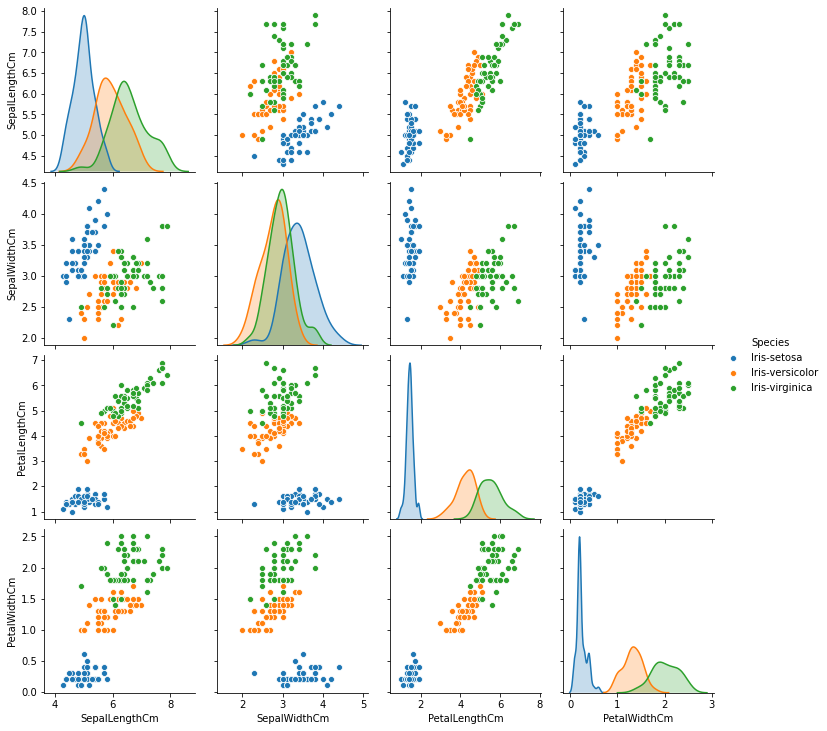

In [35]:
sns.pairplot(iris.drop(['Id'], axis=1), hue="Species")

In [36]:
x = iris.iloc[:, [1, 2, 3,4]].values
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km = km.fit(x)
    wcss.append(km.inertia_)



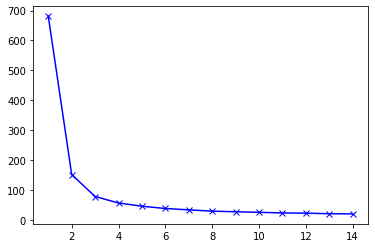

In [37]:
plt.plot(range(1, 15), wcss,'bx-')
plt.show()

BY THE ELBOW METHOD , WE CAN CLEARLY SEE THAT THE NUMBER OF CLUSTERS REQUIRED ARE 3 


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 3)

# 2. prepare the input variable x, and target output y
x,y = iris.drop(['Id','Species'],axis=1), iris['Species']

# 3. split the dataset into two parts, one for training, one for testing the model later
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

# 4. fit the model using the training data
knn.fit(x_train,y_train)

# 5. make prediction with the input from test data
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9777777777777777


In [ ]:
Let us Visualize the data now since k=3 is giving us 97% accuracy


In [47]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [48]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

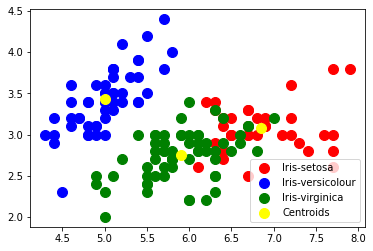

In [49]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [50]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"
  
app.run()